In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','notebook','grid'])
plt.rcParams['figure.figsize'] = (10, 7.5)

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

In [36]:
data = pd.read_csv('heart.csv')

In [106]:
data

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,140,289,0,172,0,0.0,1,0
1,49,0,160,180,0,156,0,1.0,0,1
2,37,1,130,283,0,98,0,0.0,1,0
3,48,0,138,214,0,108,1,1.5,0,1
4,54,1,150,195,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,0,1
914,68,1,144,193,1,141,0,3.4,0,1
915,57,1,130,131,0,115,1,1.2,0,1
916,57,0,130,236,0,174,0,0.0,0,1


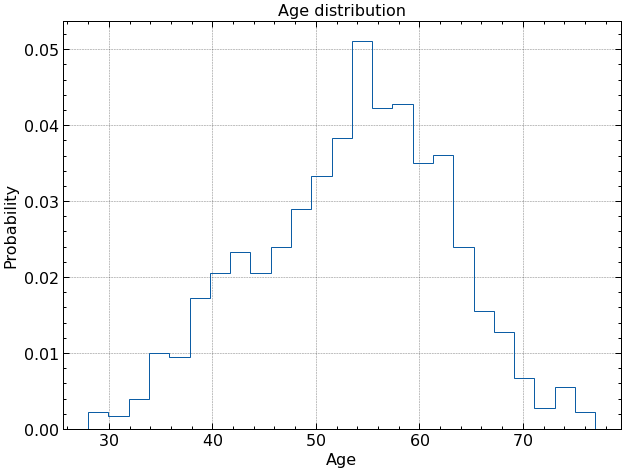

In [38]:
plt.hist(x=data['Age'],bins=25, density=True, histtype='step')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Age distribution')
plt.show()

In [57]:
data['Sex'].replace('F',0, inplace=True)
data['Sex'].replace('M',1, inplace=True)

data['ExerciseAngina'].replace('N',0, inplace=True)
data['ExerciseAngina'].replace('Y',1, inplace=True)

data['ST_Slope'].replace('Up',2, inplace=True)
data['ST_Slope'].replace('Flat',1, inplace=True)
data['ST_Slope'].replace('Down',0, inplace=True)

In [58]:
data = data.drop(columns=['ChestPainType','RestingECG'], axis=1)

KeyError: "['ChestPainType', 'RestingECG'] not found in axis"

In [189]:
X = data.drop(columns=['HeartDisease'], axis=1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [193]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)

print(f'Random Forest Classifier Accuracy: {rfc_model.score(X_test, y_test)}')

Random Forest Classifier Accuracy: 0.8434782608695652


In [194]:
lr_model = LinearRegression().fit(X_train, y_train)
print(f'Linear Regression Accuracy: {lr_model.score(X_test,y_test)}')

Linear Regression Accuracy: 0.5025743113406634


In [195]:
nb_model = GaussianNB().fit(X_train,y_train)
print(f'Naive Bayes Accuracy: {nb_model.score(X_test, y_test)}')

Naive Bayes Accuracy: 0.8695652173913043


In [85]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
               X,
               y,
               cv=10,
               scoring='accuracy',
               n_jobs=-1,
               train_sizes=np.linspace(0.01, 1, 50),
               verbose=1
               )

[learning_curve] Training set sizes: [  8  24  41  58  75  91 108 125 141 158 175 191 208 225 241 258 275 291
 308 325 342 358 375 392 408 425 442 458 475 492 508 525 542 558 575 592
 609 625 642 659 675 692 709 725 742 759 775 792 809 826]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.2s finished


In [90]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

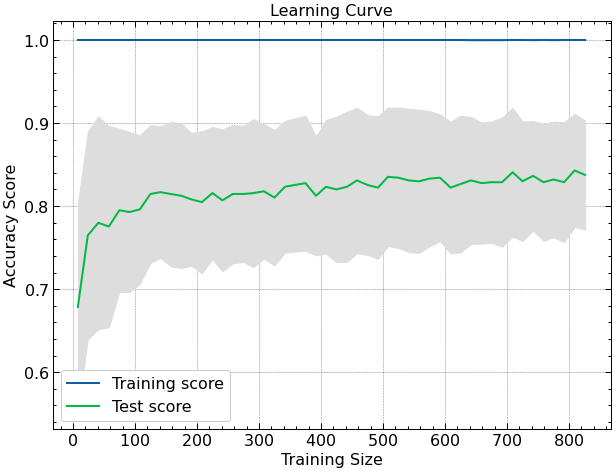

In [105]:
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Test score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

In [183]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy']
                 )

In [184]:
history = nn_model.fit(X_train,y_train,
                       batch_size=25,
                       epochs=100,
                       validation_split=0.25,
                       verbose=0
                       )

In [179]:
loss_mean = np.mean(history.history['loss'])
loss_std = np.std(history.history['loss'])

acc_mean = np.mean(history.history['accuracy'])
acc_std = np.std(history.history['accuracy'])

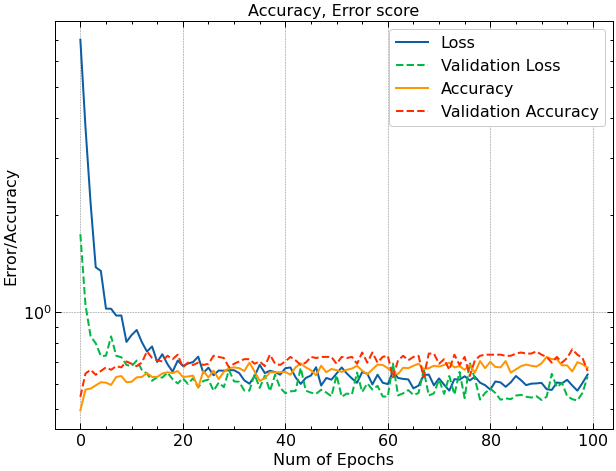

In [185]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')

plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.xlabel('Num of Epochs')
plt.ylabel('Error/Accuracy')
plt.title('Accuracy, Error score')
plt.show()